# BioSoundScapes
### An Educational Sonic Journey through your Biosignals

**BIOSOUND: What do you sound like?** <div text-justify>is an art exhibition that explores the intersection of art and science through your body. The exhibition features stations where the visitor becomes an artist. How the visitor’s artistic self is expressed will be through his/her body, more concretely with his/her Biosignals. Not only will the visitor become an artist, but he/she will also make sense of their physiology, learning about their body in the process. Through interactive installations and immersive experiences, visitors will have the opportunity to learn about the science behind biosignals and create art through sounds. In this document, we share an initial set of ideas for an art exhibition about the fascinating world of biosignals.</div>


### Why are we doing this?

We are making sound with Biosignals, just as if the signals that your body generates could be a 🎹, a 🎷, an 🪗, or even a 🪕. All that matters, is that 🎶 is played with your signals.

* **It can be used as an educational process**
What do we mean by educational process? Basically that with the sound feedback you can get more knowledge, a better understanding and more control over your signals, namely **why** does my signal change when *this* happens...or **what** happened physiologically that can be understood with the sound of signals.

* **It can be fun!!!**
Just the shear fun of it! Playing music with our biosignals can be so much fun! Expressing our feellings, our emotions, our physiology as music can be a transcendent activity and we will try to make your biosignals sound good!


### What you will find in here?

For now, you will find a list of experiments in which specific biosignals are used to modulate sound. We will start with simple amplitude and frequency modulators, but then try to expand it into more complex modulations, such as ADSR, key changes, and even try to put some AI (🤖) into play.

Here are the list of planned experiments:

* ❤️ - **ECG** -
    * A - Use the amplitude of the ECG signal to modulate the amplitude of a sine wave
    * B - Use the heart rate of the ECG signal to modulate the amplitude of a sine wave
    * C - Use the amplitude of the ECG signal to modulate the frequency of a sine wave
    * D - Use the heart rate of the ECG signal to modulate the frequency of a sine wave
    * E - Use the P peak position to play a key in a frequency based on: (1) the heart rate, (2) the amplitude of the peak.

* 💪 - **EMG** - 
    * A - Use the amplitude of the envelope of the EMG to modulate the amplitude of a sine wave
    * B - Use the amplitude of the envelope of the EMG to modulate the frequency of a sine wave
    * C - Use the amplitude of the envelope of the EMG (1 contraction) to extract ADSR parameters and modulate the key playing
    * D - Use the low pass of the EMG signal to control the keys level and play them sequentially
    
    
    
## References

I have studied and used the code from the following tutorials:

https://python.plainenglish.io/making-a-synth-with-python-oscillators-2cb8e68e9c3b

https://python.plainenglish.io/build-your-own-python-synthesizer-part-2-66396f6dad81

https://python.plainenglish.io/build-your-own-python-synthesizer-part-3-162796b7d351

In [2]:
from Synth import *
import matplotlib.pyplot as plt
from IPython.display import Audio

C:\Users\jmadr\PycharmProjects\biosig2music\Synth.py:195: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self._wave_range is not (-1, 1):
C:\Users\jmadr\PycharmProjects\biosig2music\Synth.py:229: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self._wave_range is not (-1, 1):
C:\Users\jmadr\PycharmProjects\biosig2music\Synth.py:239: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self._wave_range is not (-1, 1):


pygame 2.4.0 (SDL 2.26.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### ECG - A - Use the amplitude of the ECG signal to modulate the amplitude of a periodic wave

In [3]:
#generate ecg signal with neurokit2
ecg = nk.ecg_simulate(duration=10, sampling_rate=1000, heart_rate=60, heart_rate_std=5)
signals, info = nk.ecg_process(ecg, sampling_rate=1000)
s = np.array(signals["ECG_Clean"])

In [4]:
#load the synth object and the ecg object
synth_obj = SynthWave()
ecg_obj = Biosig(s, type="ecg")

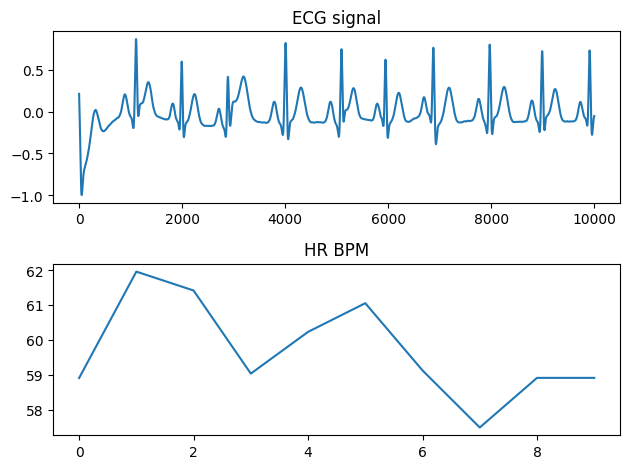

In [5]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ecg_obj.sig)
axs[0].set_title("ECG signal")
axs[1].plot(ecg_obj.rr_avg_bpm)
axs[1].set_title("HR BPM")
fig.tight_layout()

In [6]:
#create a modullated oscillator with a sine wave (other waves are TriangleOscillator, or Sawtooth oscillator)
#set signal that will modulate the wave
#define the property and method used that will be modulated (amp_mod or freq_mod)

gen = ModulatedOscillator(
        SineOscillator(freq=librosa.note_to_hz("C3")),
        ecg_obj.sig_proc,
        amp_mod=ecg_obj.amp_mod)

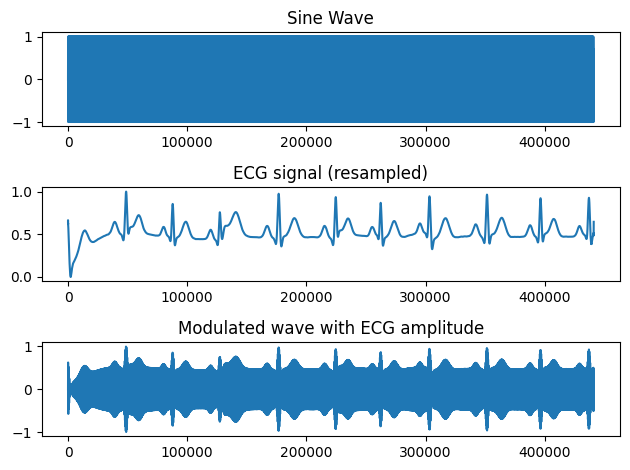

In [7]:
sine_wave = SineOscillator(freq=librosa.note_to_hz("C3"))
iter(sine_wave)
iter(gen)
wav = [next(sine_wave) for _ in range(len(ecg_obj.sig_proc))]
wav_mod = [next(gen) for _ in range(len(ecg_obj.sig_proc))]

fig, axs = plt.subplots(3, 1)
axs[0].plot(wav)
axs[0].set_title("Sine Wave")
axs[1].plot(ecg_obj.sig_proc)
axs[1].set_title("ECG signal (resampled)")
axs[2].plot(wav_mod)
axs[2].set_title("Modulated wave with ECG amplitude")
fig.tight_layout()

In [37]:
#generate wav file and play it
synth_obj.wave_to_file(wav_mod, fname="ecg_sine_amp.wav")
Audio('ecg_sine_amp.wav', autoplay=True)

### ECG - B - Use the amplitude of the ECG signal to modulate the frequency of a periodic wave

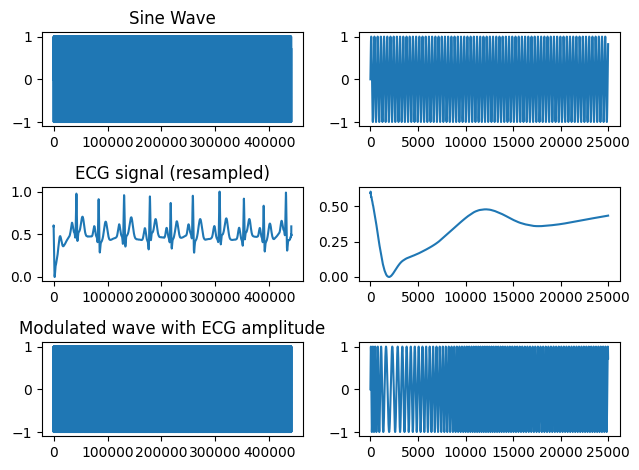

In [44]:
#Do the same but change the frequency instead

gen = ModulatedOscillator(
        SineOscillator(freq=librosa.note_to_hz("C3")),
        ecg_obj.sig_proc,
        freq_mod=ecg_obj.freq_mod_amp)

sine_wave = SineOscillator(freq=librosa.note_to_hz("C3"))
iter(sine_wave)
iter(gen)
wav = [next(sine_wave) for _ in range(len(ecg_obj.sig_proc))]
wav_mod = [next(gen) for _ in range(len(ecg_obj.sig_proc))]

fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(wav)
axs[0, 0].set_title("Sine Wave")
axs[0, 1].plot(wav[0:25000])
axs[1, 0].plot(ecg_obj.sig_proc)
axs[1, 0].set_title("ECG signal (resampled)")
axs[1, 1].plot(ecg_obj.sig_proc[0:25000])
axs[2, 0].plot(wav_mod)
axs[2, 0].set_title("Modulated wave with ECG amplitude")
axs[2, 1].plot(wav_mod[0:25000])
fig.tight_layout()

In [43]:
#generate wav file and play it
synth_obj.wave_to_file(wav_mod, fname="ecg_sine_freq.wav")
Audio('ecg_sine_freq.wav', autoplay=True)

### ECG - C - Use the heart rate of the ECG signal to modulate the amplitude of a periodic wave

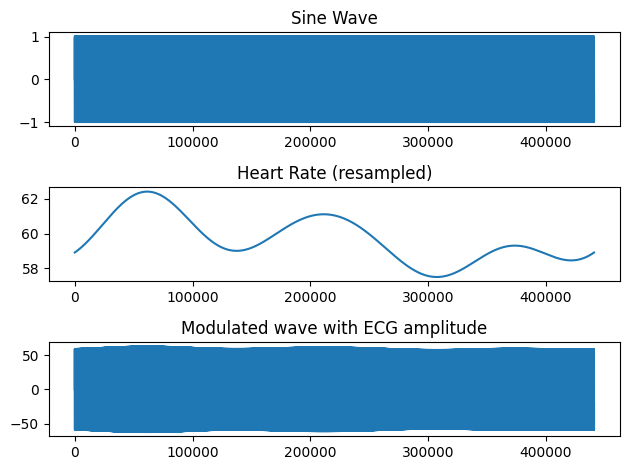

In [17]:
gen_c = ModulatedOscillator(
        SineOscillator(freq=librosa.note_to_hz("G4")),
        ecg_obj.rr_avg_res,
        amp_mod=ecg_obj.amp_mod)

sine_wave = SineOscillator(freq=librosa.note_to_hz("G4"))
iter(sine_wave)
iter(gen_c)
wav = [next(sine_wave) for _ in range(len(ecg_obj.rr_avg_res))]
wav_mod = [next(gen_c) for _ in range(len(ecg_obj.rr_avg_res))]

fig, axs = plt.subplots(3, 1)
axs[0].plot(wav)
axs[0].set_title("Sine Wave")
axs[1].plot(ecg_obj.rr_avg_res)
axs[1].set_title("Heart Rate (resampled)")
axs[2].plot(wav_mod)
axs[2].set_title("Modulated wave with ECG amplitude")
fig.tight_layout()

In [16]:
#generate wav file and play it
synth_obj.wave_to_file(wav_mod, fname="hr_amp.wav")
Audio('hr_amp.wav', autoplay=True)

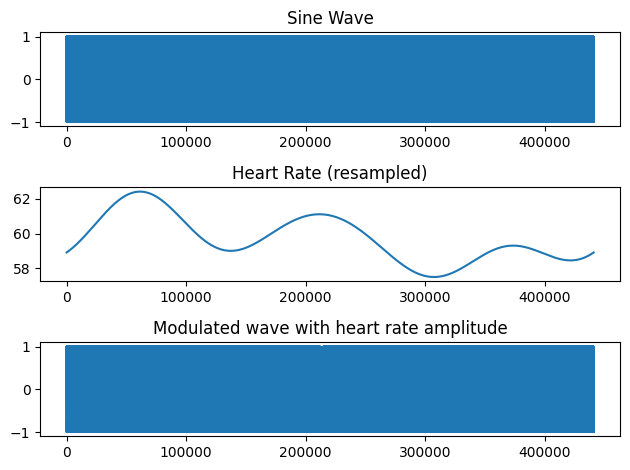

In [19]:
gen_c = ModulatedOscillator(
        SineOscillator(freq=librosa.note_to_hz("G4")),
        ecg_obj.rr_avg_res,
        freq_mod=ecg_obj.freq_mod_amp)

sine_wave = SineOscillator(freq=librosa.note_to_hz("G4"))
iter(sine_wave)
iter(gen_c)
wav = [next(sine_wave) for _ in range(len(ecg_obj.rr_avg_res))]
wav_mod = [next(gen_c) for _ in range(len(ecg_obj.rr_avg_res))]

fig, axs = plt.subplots(3, 1)
axs[0].plot(wav)
axs[0].set_title("Sine Wave")
axs[1].plot(ecg_obj.rr_avg_res)
axs[1].set_title("Heart Rate (resampled)")
axs[2].plot(wav_mod)
axs[2].set_title("Modulated wave with heart rate amplitude")
fig.tight_layout()

In [20]:
#generate wav file and play it
synth_obj.wave_to_file(wav_mod, fname="hr_freq.wav")
Audio('hr_freq.wav', autoplay=True)

### ECG - E - Play a sequence of keys modulated based on the amplitude of the heart rate of the ECG, and in stereo with the beats modulating a sine wave's amplitude

In [47]:
gen = ModulatedOscillator(
        SineOscillator(freq=librosa.note_to_hz("G3")),
        ecg_obj.sig_proc,
        amp_mod=ecg_obj.amp_mod)

gen2 = SineOscillator(freq=librosa.note_to_hz("C4"))

In [48]:
iter(gen)
wav = [next(gen) for _ in range(len(ecg_obj.sig_proc))]
notes_seq = amp2keys(ecg_obj.rr_avg_bpm, 90, 40)
dur_sec = len(wav)/44100

#create melody
s1, l1 = createMelody(notes_seq, ecg_obj.rr_, dur_sec)
wav2 = synth_obj.get_seq([gen2], notes=s1, note_lens=l1)

In [49]:
#generate wav file and play it
synth_obj.wave_to_file(wav2, fname="ecg_melody_mono.wav")
Audio('ecg_melody_mono.wav', autoplay=True)

In [50]:
#generate wav file and play it
synth_obj.wave_to_file(wav[:len(wav2)], wav2, fname="ecg_melody_stereo.wav")
Audio('ecg_melody_stereo.wav', autoplay=True)